In [34]:
!which python

/opt/anaconda3/bin/python


In [35]:
# import the following libraries for our web scraping project

import requests # to make https requests
from bs4 import BeautifulSoup # our web scraping library

import pandas as pd # for making dataframe later

In [36]:
# save the data from the website as a "soup" object

site = requests.get('https://translegislation.com/bills/2024/US') # gets the URL
html_code = site.content # saves the HTML code
soup = BeautifulSoup(html_code, 'lxml') # creates a soup object

In [37]:
# runs the loop on the bill cards
bill_cards = soup.find_all('div', class_ ='css-4rck61')

# creating empty lists to hold all of our data
titles = []
captions = []
categories = []
descriptions = []

# extracting the data from the bill cards
for item in bill_cards:
    title = item.h3.text
    category = item.find('span').text
    caption = item.h2.text
    if item.h2.text is not None:
        description = item.h2.text
    else:
        description = 'No bill description'
    
    # adding the items to the empty lists
    titles.append(title)
    categories.append(category)
    captions.append(caption)
    descriptions.append(description)
    # remember that "legiscan_links" is already saved as a list, so we don't have to create it here

In [38]:
urls24 = []
for item in bill_cards:
    extension = 'https://translegislation.com/' + item.a['href']
    urls24.append(extension)

# making a soup object of *every* page that is linked
# this may take several seconds
soups = []
for item in urls24:
    site = requests.get(item)
    html_code = site.content
    soup = BeautifulSoup(html_code, 'lxml')
    soups.append(soup)


legiscan_links = []
congress_links = []
for item in soups:
    # we are getting two links here, one to legiscan and one to the congress website
    links = item.find_all('a', class_='chakra-link css-oga2ct')
    anchor1 = links[0]['href'] # link to legiscan
    legiscan_links.append(anchor1)
    anchor2 = links[1]['href'] # link to congress
    congress_links.append(anchor2)

In [39]:
# creating a dataframe, with separate columns to hold each of our lists
df24 = pd.DataFrame(
    {'title': titles,
     'caption': captions,
     'category': categories,
     'description': descriptions,
     'url': urls24,
     'legiscan': legiscan_links,
     'congress': congress_links
    })

In [40]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        88 non-null     object
 1   caption      88 non-null     object
 2   category     88 non-null     object
 3   description  88 non-null     object
 4   url          88 non-null     object
 5   legiscan     88 non-null     object
 6   congress     88 non-null     object
dtypes: object(7)
memory usage: 4.9+ KB


In [41]:
df24.head()

,title,caption,category,description,url,legiscan,congress
0,US HB10075,Stopping the Mutilation of Children Act of 2024,HEALTHCARE,Stopping the Mutilation of Children Act of 2024,https://translegislation.com//bills/2024/US/HB...,https://legiscan.com/US/text/HB10075/id/3025659,https://www.congress.gov/bill/118th-congress/h...
1,US HB10186,Protecting Women’s Private Spaces Act,BIRTH CERTIFICATES,Protecting Women’s Private Spaces Act,https://translegislation.com//bills/2024/US/HB...,https://legiscan.com/US/text/HB10186/id/3029142,https://www.congress.gov/bill/118th-congress/h...
2,US HB10195,No Discrimination in Housing Act,OTHER,No Discrimination in Housing Act,https://translegislation.com//bills/2024/US/HB...,https://legiscan.com/US/text/HB10195/id/3029424,https://www.congress.gov/bill/118th-congress/h...
3,US HB10290,Stop the Invasion of Women’s Spaces Act,INCARCERATION,Stop the Invasion of Women’s Spaces Act,https://translegislation.com//bills/2024/US/HB...,https://legiscan.com/US/text/HB10290/id/3038024,https://www.congress.gov/bill/118th-congress/h...
4,US HB1064,Ensuring Military Readiness Act of 2023,MILITARY,Ensuring Military Readiness Act of 2023,https://translegislation.com//bills/2024/US/HB...,https://legiscan.com/US/text/HB1064/id/2737306,https://www.congress.gov/bill/118th-congress/h...


In [42]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: /Users/michaelajackson/Desktop/Antitrans/GA-Trans-Leg


In [43]:
df24.to_csv('/Users/michaelajackson/Desktop/Antitrans/GA-Trans-Leg/2024CSV')

In [44]:
#restarting the process for 2025
site25 = requests.get('https://translegislation.com/bills/2025/US') # gets the URL
html_code25 = site25.content # saves the HTML code
soup25 = BeautifulSoup(html_code25, 'lxml') # creates a soup object

In [45]:
# runs the loop on the bill cards
bill_cards25 = soup25.find_all('div', class_ ='css-4rck61')

# creating empty lists to hold all of our data
titles25 = []
captions25 = []
categories25 = []
descriptions25 = []

# extracting the data from the bill cards
for item in bill_cards25:
    title25 = item.h3.text
    category25 = item.find('span').text
    caption25 = item.h2.text
    if item.h2.text is not None:
        description25 = item.h2.text
    else:
        description25 = 'No bill description'
    
    # adding the items to the empty lists
    titles25.append(title25)
    categories25.append(category25)
    captions25.append(caption25)
    descriptions25.append(description25)
    # remember that "legiscan_links" is already saved as a list, so we don't have to create it here

In [46]:
urls25 = []
for item in bill_cards25:
    extension25 = 'https://translegislation.com/' + item.a['href']
    urls25.append(extension25)

# making a soup object of *every* page that is linked
# this may take several seconds
soups25 = []
for item in urls25:
    site25 = requests.get(item)
    html_code25 = site25.content
    soup25 = BeautifulSoup(html_code25, 'lxml')
    soups25.append(soup25)

legiscan_links25 = []
for item in soups25:
    # we are getting two links here, one to legiscan and one to the congress website and adding if statement for bills with no links
    links25 = item.find_all('a', class_='chakra-link css-oga2ct')
    # Default values
  #  legiscan_link = "Not available"
  #  congress_link = "Not available"
    
    # Check each link
 #   for link in links25:
   #     href = link.get('href', '')
        # If it’s a Legiscan link
   #     if "legiscan.com" in href:
   #         legiscan_link = href
        # If it’s a Congress link
   #     elif "congress.gov" in href:
    #         congress_link = href

    # legiscan_links.append(legiscan_link)
    # congress_links.append(congress_link)

In [47]:
for item in links25:
    print(links25)

[<a class="chakra-link css-oga2ct" href="https://legiscan.com/US/text/SR22/id/3056371" style="text-decoration:underline" target="_blank">View bill on LegiScan</a>, <a class="chakra-link css-oga2ct" href="https://www.congress.gov/bill/119th-congress/senate-resolution/22/all-info" style="text-decoration:underline" target="_blank">View bill on state website</a>, <a class="chakra-link css-oga2ct" href="https://ballotpedia.org/Marsha_Blackburn" target="_blank">Marsha Blackburn<!-- --> (<!-- -->R<!-- -->)</a>, <a class="chakra-link css-oga2ct" href="https://ballotpedia.org/Jim_Risch" target="_blank">James Risch<!-- --> (<!-- -->R<!-- -->)</a>, <a class="chakra-link css-oga2ct" href="https://ballotpedia.org/Roger_Wicker" target="_blank">Roger Wicker<!-- --> (<!-- -->R<!-- -->)</a>, <a class="chakra-link css-oga2ct" href="https://ballotpedia.org/James_Lankford" target="_blank">James Lankford<!-- --> (<!-- -->R<!-- -->)</a>, <a class="chakra-link css-oga2ct" href="https://ballotpedia.org/Mike_C

In [48]:
len(links25)

16

In [49]:
congress_links25 = []

for item in soups25:
    links25 = item.find_all('a', class_='chakra-link css-oga2ct')
    for link in links25:
        href = link.get("href")
        if href and "congress.gov" in href:
            congress_links25.append(href)

print(len(congress_links25))

35


In [50]:
print(congress_links25)

['https://www.congress.gov/bill/119th-congress/house-bill/1015/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1016/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1017/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1028/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1139/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1208/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1282/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/1866/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/2197/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/2202/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/28/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/461/all-info', 'https://www.congress.gov/bill/119th-congress/house-bill/498/all-info', 'https://www.congress.gov/bill/119th-congress/house-bi

In [51]:
# creating a dataframe, with separate columns to hold each of our lists
df25 = pd.DataFrame(
    {'title': titles25,
     'caption': captions25,
     'category': categories25,
     'description': descriptions25,
     'url': urls25,
     'congress': congress_links25
    })

In [52]:
df25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        35 non-null     object
 1   caption      35 non-null     object
 2   category     35 non-null     object
 3   description  35 non-null     object
 4   url          35 non-null     object
 5   congress     35 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [53]:
df25.head()

,title,caption,category,description,url,congress
0,US HB1015,Prison Rape Prevention Act of 2025,HEALTHCARE,Prison Rape Prevention Act of 2025,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...
1,US HB1016,Protecting Women’s Private Spaces Act,BATHROOM,Protecting Women’s Private Spaces Act,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...
2,US HB1017,Stop the Invasion of Women’s Spaces Act,BATHROOM,Stop the Invasion of Women’s Spaces Act,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...
3,US HB1028,Protection of Women in Olympic and Amateur Spo...,SPORTS,Protection of Women in Olympic and Amateur Spo...,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...
4,US HB1139,Passport Sanity Act,BIRTH CERTIFICATES,Passport Sanity Act,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...


In [54]:
df25.to_csv('/Users/michaelajackson/Desktop/Antitrans/GA-Trans-Leg/2025CSV')

In [55]:
df24.drop('legiscan', axis=1, inplace=True)

In [56]:
#combining both dfs into 1
df_combined = pd.concat([df24, df25], ignore_index=True)

In [57]:
df_combined.head()

,title,caption,category,description,url,congress
0,US HB10075,Stopping the Mutilation of Children Act of 2024,HEALTHCARE,Stopping the Mutilation of Children Act of 2024,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...
1,US HB10186,Protecting Women’s Private Spaces Act,BIRTH CERTIFICATES,Protecting Women’s Private Spaces Act,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...
2,US HB10195,No Discrimination in Housing Act,OTHER,No Discrimination in Housing Act,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...
3,US HB10290,Stop the Invasion of Women’s Spaces Act,INCARCERATION,Stop the Invasion of Women’s Spaces Act,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...
4,US HB1064,Ensuring Military Readiness Act of 2023,MILITARY,Ensuring Military Readiness Act of 2023,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...


In [58]:
#creating new column named "session" that pulls the congress session number (either 118 or 119) from the urls in congress column
import re

# Function to extract the Congress session from a URL
def extract_session(url):
    match = re.search(r'/(\d+)(?:th)?-congress/', url)
    return int(match.group(1)) if match else None

In [59]:
df_combined['session'] = df_combined['congress'].apply(extract_session)

In [60]:
print(df_combined['session'].unique())

[118 119]


In [61]:
#sorting values by session number in congress url
df_combined.sort_values(by='session', ascending=True, inplace=True)
df_combined.tail()

,title,caption,category,description,url,congress,session
100,US HB498,Do No Harm in Medicaid Act,HEALTHCARE,Do No Harm in Medicaid Act,https://translegislation.com//bills/2025/US/HB498,https://www.congress.gov/bill/119th-congress/h...,119
101,US HB600,WHO is Accountable Act,HEALTHCARE,WHO is Accountable Act,https://translegislation.com//bills/2025/US/HB600,https://www.congress.gov/bill/119th-congress/h...,119
102,US HB653,Protect Minors from Medical Malpractice Act of...,HEALTHCARE,Protect Minors from Medical Malpractice Act of...,https://translegislation.com//bills/2025/US/HB653,https://www.congress.gov/bill/119th-congress/h...,119
104,US HB800,DEI to DIE Act,OTHER,DEI to DIE Act,https://translegislation.com//bills/2025/US/HB800,https://www.congress.gov/bill/119th-congress/h...,119
122,US SR22,A resolution concerning the National Collegiat...,SPORTS,A resolution concerning the National Collegiat...,https://translegislation.com//bills/2025/US/SR22,https://www.congress.gov/bill/119th-congress/s...,119


In [62]:
#Government website has bot blocks to the code in the block does not work

# Create a new column with "/all-info" replaced by "/text"
#df_combined['text'] = df_combined['congress'].str.replace('/all-info', '/text/is?format=txt', regex=False)

#print(df_combined['text'][30])

#df_combined.info()

#df_combined.head()

#creating function for extracting text from links in text cloumn

#def extract_text(url):
   # try:
   #     sitetext = requests.get(url) # gets the URL
   #     html_codetext = sitetext.content # saves the HTML code
   #     souptext = BeautifulSoup(html_codetext, 'lxml') # creates a soup object

# Find the <pre> tag containing the bill text
     #   bill_text = souptext.find('pre', {'id': 'billTextContainer'})
        
      #  return bill_text.get_text(strip=True) if bill_text else "Bill text not found"
  #  except requests.RequestException as e:
      #  return f"Error: {e}"  # Handle request errors for sites with pdfs instead of html

#df_combined['bill_text'] = df_combined['text'].apply(extract_text)

In [63]:
df_combined.sample(20)

,title,caption,category,description,url,congress,session
75,US SB3729,Protection of Women in Olympic and Amateur Spo...,SPORTS,Protection of Women in Olympic and Amateur Spo...,https://translegislation.com//bills/2024/US/SB...,https://www.congress.gov/bill/118th-congress/s...,118
93,US HB1208,No Tax Breaks for Radical Corporate Activism Act,HEALTHCARE,No Tax Breaks for Radical Corporate Activism Act,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...,119
8,US HB1490,Preventing Violence Against Female Inmates Act...,INCARCERATION,Preventing Violence Against Female Inmates Act...,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118
84,US SJR96,A joint resolution providing for congressional...,EDUCATION,A joint resolution providing for congressional...,https://translegislation.com//bills/2024/US/SJR96,https://www.congress.gov/bill/118th-congress/s...,118
37,US HB7725,To amend the Higher Education Act of 1965 to p...,EDUCATION,To amend the Higher Education Act of 1965 to p...,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118
41,US HB8708,Eliminate DEI in Colleges Act,EDUCATION,Eliminate DEI in Colleges Act,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118
51,US HB9029,"Department of Education Appropriations Act, 20...",HEALTHCARE,"Department of Education Appropriations Act, 20...",https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118
117,US SB74,Fair Play for Girls Act,SPORTS,Fair Play for Girls Act,https://translegislation.com//bills/2025/US/SB74,https://www.congress.gov/bill/119th-congress/s...,119
59,US HR1579,"Prohibiting Members, officers, and employees o...",BATHROOM,"Prohibiting Members, officers, and employees o...",https://translegislation.com//bills/2024/US/HR...,https://www.congress.gov/bill/118th-congress/h...,118
60,US HR282,Expressing that compelled political litmus tes...,EDUCATION,Expressing that compelled political litmus tes...,https://translegislation.com//bills/2024/US/HR282,https://www.congress.gov/bill/118th-congress/h...,118


In [64]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        123 non-null    object
 1   caption      123 non-null    object
 2   category     123 non-null    object
 3   description  123 non-null    object
 4   url          123 non-null    object
 5   congress     123 non-null    object
 6   session      123 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 7.7+ KB


In [65]:
df_combined['congress'].duplicated().sum()

0

In [66]:
df_combined.loc[110, 'congress']

'https://www.congress.gov/bill/119th-congress/house-resolution/47/all-info'

In [67]:
# extract the number and put into a separate list for urls later
numbers = []
for row in df_combined['title']:
    splitted = row.split()
    for item in splitted:
        numeric_part = ''.join(filter(str.isdigit, item))
        if numeric_part:
            numbers.append(numeric_part)


In [68]:
len(numbers)

123

In [69]:
numbers[:10]

['10075', '769', '536', '518', '282', '1579', '1223', '115', '165', '1595']

In [70]:
df_combined['bill_num'] = numbers

In [71]:
df_combined.sample(6)

,title,caption,category,description,url,congress,session,bill_num
8,US HB1490,Preventing Violence Against Female Inmates Act...,INCARCERATION,Preventing Violence Against Female Inmates Act...,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118,1490
114,US SB405,Protection of Women in Olympic and Amateur Spo...,SPORTS,Protection of Women in Olympic and Amateur Spo...,https://translegislation.com//bills/2025/US/SB405,https://www.congress.gov/bill/119th-congress/s...,119,405
110,US HR47,Concerning the National Collegiate Athletic As...,SPORTS,Concerning the National Collegiate Athletic As...,https://translegislation.com//bills/2025/US/HR47,https://www.congress.gov/bill/119th-congress/h...,119,47
94,US HB1282,Eliminate DEI in Colleges Act,EDUCATION,Eliminate DEI in Colleges Act,https://translegislation.com//bills/2025/US/HB...,https://www.congress.gov/bill/119th-congress/h...,119,1282
31,US HB6658,SAFE Home Act Sensible Adoption For Every Home...,OTHER,SAFE Home Act Sensible Adoption For Every Home...,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118,6658
16,US HB3887,Children’s Hospital GME Support Reauthorizatio...,HEALTHCARE,Children’s Hospital GME Support Reauthorizatio...,https://translegislation.com//bills/2024/US/HB...,https://www.congress.gov/bill/118th-congress/h...,118,3887


In [95]:
#house vs senate resolution
bill_type = []
bill_type = df_combined['congress'].str.extract(r'(house-bill|senate-bill|house-resolution|senate-resolution)', expand=False)

In [97]:
df_combined['bill_type'] = bill_type

In [74]:
missing_types = df_combined[df_combined['bill_type'].isnull()]
missing_types

,title,caption,category,description,url,congress,session,bill_num,bill_type
56,US HJR165,Providing for congressional disapproval under ...,EDUCATION,Providing for congressional disapproval under ...,https://translegislation.com//bills/2024/US/HJ...,https://www.congress.gov/bill/118th-congress/h...,118,165,NaN
55,US HJR160,Providing for congressional disapproval under ...,HEALTHCARE,Providing for congressional disapproval under ...,https://translegislation.com//bills/2024/US/HJ...,https://www.congress.gov/bill/118th-congress/h...,118,160,NaN
84,US SJR96,A joint resolution providing for congressional...,EDUCATION,A joint resolution providing for congressional...,https://translegislation.com//bills/2024/US/SJR96,https://www.congress.gov/bill/118th-congress/s...,118,96,NaN
83,US SJR90,A joint resolution providing for congressional...,HEALTHCARE,A joint resolution providing for congressional...,https://translegislation.com//bills/2024/US/SJR90,https://www.congress.gov/bill/118th-congress/s...,118,90,NaN


In [75]:
pd.set_option('display.max_colwidth', None)

In [76]:
#manually entering missing bill types

df_combined.loc[56, 'bill_type'] = 'house-joint-resolution'
df_combined.loc[55, 'bill_type'] = 'house-joint-resolution'
df_combined.loc[84, 'bill_type'] = 'senate-joint-resolution'
df_combined.loc[83, 'bill_type'] = 'senate-joint-resolution'

In [77]:
map_code = {
    'house-bill': 'hr',
    'senate-bill': 's',
    'house-resolution': 'hres',
    'senate-resolution': 'sres',
    'house-joint-resolution': 'hjres',
    'senate-joint-resolution': 'sjres'
}

In [78]:
df_combined['bill_code'] = df_combined['bill_type'].map(map_code)

In [79]:
missing_codes = df_combined[df_combined['bill_code'].isnull()]
missing_codes

,title,caption,category,description,url,congress,session,bill_num,bill_type,bill_code


In [80]:

def xml_links(numbers, sessions, bill_code):
    urls = []
    for num, session, code in zip(numbers, sessions, bill_code):
            suffix = 'ih' if code.startswith('h') else 'is'
            url = f'https://www.congress.gov/{session}/bills/{code}{num}/BILLS-{session}{code}{num}{suffix}.xml'
                #example- https://www.congress.gov/119/bills/hr1015/BILLS-119hr1015ih.xml
                #example- https://www.congress.gov/119/bills/hres157/BILLS-119hres157ih.xml
                #example- https://www.congress.gov/119/bills/s209/BILLS-119s209is.xml
                #example- https://www.congress.gov/119/bills/sres22/BILLS-119sres22is.xml

            try:
                response = requests.get(url)
                if response.status_code == 200:
                    urls.append(url)
                else:
                    urls.append(None)
            except:
                urls.append(None)
            
    return urls

In [81]:
urls = xml_links(
    df_combined['bill_num'],
    df_combined['session'],
    df_combined['bill_code']
)

In [82]:
assert len(urls) == len(df_combined)

In [83]:
#applying above
df_combined['xml_url'] = urls

In [84]:
df_combined.head()

,title,caption,category,description,url,congress,session,bill_num,bill_type,bill_code,xml_url
0,US HB10075,Stopping the Mutilation of Children Act of 2024,HEALTHCARE,Stopping the Mutilation of Children Act of 2024,https://translegislation.com//bills/2024/US/HB10075,https://www.congress.gov/bill/118th-congress/house-bill/10075/all-info,118,10075,house-bill,hr,https://www.congress.gov/118/bills/hr10075/BILLS-118hr10075ih.xml
64,US HR769,"Expressing support for the designation of October 10, 2023, as ""Real Women's Day"".",CIVIL RIGHTS,"Expressing support for the designation of October 10, 2023, as ""Real Women's Day"".",https://translegislation.com//bills/2024/US/HR769,https://www.congress.gov/bill/118th-congress/house-resolution/769/all-info,118,769,house-resolution,hres,https://www.congress.gov/118/bills/hres769/BILLS-118hres769ih.xml
63,US HR536,"Supporting the designation of the week including June 23, 2023, as ""National Women's Sports Week"" to celebrate the anniversary of the passage of title IX and the growth of women's sports.",SPORTS,"Supporting the designation of the week including June 23, 2023, as ""National Women's Sports Week"" to celebrate the anniversary of the passage of title IX and the growth of women's sports.",https://translegislation.com//bills/2024/US/HR536,https://www.congress.gov/bill/118th-congress/house-resolution/536/all-info,118,536,house-resolution,hres,https://www.congress.gov/118/bills/hres536/BILLS-118hres536ih.xml
62,US HR518,Pushing back against the labeling of attempts by parents to ensure school curriculum and sports are age and sex appropriate as extreme.,EDUCATION,Pushing back against the labeling of attempts by parents to ensure school curriculum and sports are age and sex appropriate as extreme.,https://translegislation.com//bills/2024/US/HR518,https://www.congress.gov/bill/118th-congress/house-resolution/518/all-info,118,518,house-resolution,hres,https://www.congress.gov/118/bills/hres518/BILLS-118hres518ih.xml
60,US HR282,Expressing that compelled political litmus tests used by public institutions to require individuals to identify with specific ideological views are directly at odds with the principles of academic freedom and free speech and in violation of the First Amendment of the Constitution.,EDUCATION,Expressing that compelled political litmus tests used by public institutions to require individuals to identify with specific ideological views are directly at odds with the principles of academic freedom and free speech and in violation of the First Amendment of the Constitution.,https://translegislation.com//bills/2024/US/HR282,https://www.congress.gov/bill/118th-congress/house-resolution/282/all-info,118,282,house-resolution,hres,https://www.congress.gov/118/bills/hres282/BILLS-118hres282ih.xml


In [85]:
df_combined['xml_url'].isnull().sum()

17

In [86]:
missing_urls = df_combined[df_combined['xml_url'].isnull()]
missing_urls

,title,caption,category,description,url,congress,session,bill_num,bill_type,bill_code,xml_url
51,US HB9029,"Department of Education Appropriations Act, 2025 Department of Health and Human Services Appropriations Act, 2025 Department of Labor Appropriations Act, 2025",HEALTHCARE,"Department of Education Appropriations Act, 2025 Department of Health and Human Services Appropriations Act, 2025 Department of Labor Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB9029,https://www.congress.gov/bill/118th-congress/house-bill/9029/all-info,118,9029,house-bill,hr,None
50,US HB9028,"Department of Transportation Appropriations Act, 2025 Department of Housing and Urban Development Appropriations Act, 2025",MARRIAGE,"Department of Transportation Appropriations Act, 2025 Department of Housing and Urban Development Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB9028,https://www.congress.gov/bill/118th-congress/house-bill/9028/all-info,118,9028,house-bill,hr,None
49,US HB9027,"Agriculture, Rural Development, Food and Drug Administration, and Related Agencies Appropriations Act, 2025",MARRIAGE,"Agriculture, Rural Development, Food and Drug Administration, and Related Agencies Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB9027,https://www.congress.gov/bill/118th-congress/house-bill/9027/all-info,118,9027,house-bill,hr,None
48,US HB9026,"Science Appropriations Act, 2025 Department of Justice Appropriations Act, 2025 Department of Commerce Appropriations Act, 2025",HEALTHCARE,"Science Appropriations Act, 2025 Department of Justice Appropriations Act, 2025 Department of Commerce Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB9026,https://www.congress.gov/bill/118th-congress/house-bill/9026/all-info,118,9026,house-bill,hr,None
47,US HB8998,"Department of the Interior, Environment, and Related Agencies Appropriations Act, 2025",MARRIAGE,"Department of the Interior, Environment, and Related Agencies Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB8998,https://www.congress.gov/bill/118th-congress/house-bill/8998/all-info,118,8998,house-bill,hr,None
46,US HB8997,"Energy and Water Development and Related Agencies Appropriations Act, 2025",MARRIAGE,"Energy and Water Development and Related Agencies Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB8997,https://www.congress.gov/bill/118th-congress/house-bill/8997/all-info,118,8997,house-bill,hr,None
78,US SB4638,Military Construction Authorization Act for Fiscal Year 2025,HEALTHCARE,Military Construction Authorization Act for Fiscal Year 2025,https://translegislation.com//bills/2024/US/SB4638,https://www.congress.gov/bill/118th-congress/senate-bill/4638/all-info,118,4638,senate-bill,s,None
44,US HB8774,"Department of Defense Appropriations Act, 2025",HEALTHCARE,"Department of Defense Appropriations Act, 2025",https://translegislation.com//bills/2024/US/HB8774,https://www.congress.gov/bill/118th-congress/house-bill/8774/all-info,118,8774,house-bill,hr,None
61,US HR298,"Providing for consideration of the bill (H.R. 734) to amend the Education Amendments of 1972 to provide that for purposes of determining compliance with title IX of such Act in athletics, sex shall be recognized based solely on a person's reproductive biology and genetics at birth, and providing for consideration of the joint resolution (H.J. Res. 42) disapproving the action of the District of Columbia Council in approving the Comprehensive Policing and Justice Reform Amendment Act of 2022.",SPORTS,"Providing for consideration of the bill (H.R. 734) to amend the Education Amendments of 1972 to provide that for purposes of determining compliance with title IX of such Act in athletics, sex shall be recognized based solely on a person's reproductive biology and genetics at birth, and providing for consideration of the joint resolution (H.J. Res. 42) disapproving the action of the District of Columbia C

In [87]:
#manually replacing missing urls
#As of 03/28/2025 text has not been received for H.R.2197 or H.R. 2202
df_combined.loc[40, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8580/BILLS-118hr8580pcs.xml'
df_combined.loc[42, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8752/BILLS-118hr8752eh.xml'
df_combined.loc[43, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8771/BILLS-118hr8771pcs.xml'
df_combined.loc[44, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8774/BILLS-118hr8774pcs.xml'
df_combined.loc[47, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8998/BILLS-118hr8998pcs.xml'
df_combined.loc[48, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9026/BILLS-118hr9026rh.xml'
df_combined.loc[49, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9027/BILLS-118hr9027rh.xml'
df_combined.loc[50, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9028/BILLS-118hr9028rh.xml'
df_combined.loc[51, 'xml_url'] = 'https://www.congress.gov/118/bills/hr9029/BILLS-118hr9029rh.xml'
df_combined.loc[46, 'xml_url'] = 'https://www.congress.gov/118/bills/hr8997/BILLS-118hr8997rh.xml'
df_combined.loc[78, 'xml_url'] = 'https://www.congress.gov/118/bills/s4638/BILLS-118s4638rs.xml'
df_combined.loc[61, 'xml_url'] = 'https://www.congress.gov/118/bills/hres298/BILLS-118hres298eh.xml'
df_combined.loc[19, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4367/BILLS-118hr4367eh.xml'
df_combined.loc[18, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4365/BILLS-118hr4365pcs.xml'
df_combined.loc[21, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4665/BILLS-118hr4665pcs.xml'
df_combined.loc[22, 'xml_url'] = 'https://www.congress.gov/118/bills/hr4821/BILLS-118hr4821pcs.xml'
df_combined.loc[119, 'xml_url'] = 'https://www.congress.gov/119/bills/s9/BILLS-119s9pcs.xml'

In [88]:
# function that contains a loop to insert bill numbers
# into the URL, then to grab the content and add to a new list
def scrape_bill_text(urls):
    return [
        requests.get(url).text if pd.notnull(url) else None
        for url in urls]


In [89]:
#checking if function works
xml_text = scrape_bill_text(df_combined['xml_url'])

In [90]:
xml_text[0]

'<?xml version="1.0"?>\n<?xml-stylesheet type="text/xsl" href="billres.xsl"?>\n<!DOCTYPE bill PUBLIC "-//US Congress//DTDs/bill.dtd//EN" "bill.dtd">\n<bill bill-stage="Introduced-in-House" dms-id="HD3E761E68798452BA4F0F32A6AB2659A" public-private="public" key="H" bill-type="olc"><metadata xmlns:dc="http://purl.org/dc/elements/1.1/">\n<dublinCore>\n<dc:title>118 HR 10075 IH: Stopping the Mutilation of Children Act of 2024</dc:title>\n<dc:publisher>U.S. House of Representatives</dc:publisher>\n<dc:date>2024-10-29</dc:date>\n<dc:format>text/xml</dc:format>\n<dc:language>EN</dc:language>\n<dc:rights>Pursuant to Title 17 Section 105 of the United States Code, this file is not subject to copyright protection and is in the public domain.</dc:rights>\n</dublinCore>\n</metadata>\n<form>\n<distribution-code display="yes">I</distribution-code><congress display="yes">118th CONGRESS</congress><session display="yes">2d Session</session><legis-num display="yes">H. R. 10075</legis-num><current-chamber

In [91]:
with open('Bill_text.txt', 'w', encoding='utf-8') as f:
    for item in xml_text:
        f.write(str(item) + '\n')

In [92]:
#Cleaning full text 

In [ ]:
# loading up the texts that we just saved
load = open('./Bill_text.txt')
data = load.read()
load.close()

In [111]:
from bs4 import BeautifulSoup

In [113]:
soup = BeautifulSoup(data, 'xml')
text_only = soup.get_text(separator=' ', strip=True)

In [115]:
# remove all the characters in the "take out" list by writing a
# loop that replaces those characters with an empty character, ''
def clean_up(text):
    take_out = ['\n', '/n', '\\n', '_', '[', ']', '<html><body><pre>', '<html><body><pre>', '  ']
    for item in take_out:
        if item in text:
            text = text.replace(item, '')
    return text


cleaned = clean_up(text_only)

In [99]:
del type

In [117]:
type(cleaned)

str

In [125]:
cleaned[0:3000]

'118 HR 10075 IH: Stopping the Mutilation of Children Act of 2024 U.S. House of Representatives 2024-10-29 text/xml EN Pursuant to Title 17 Section 105 of the United States Code, this file is not subject to copyright protection and is in the public domain. I 118th CONGRESS 2d Session H. R. 10075 IN THE HOUSE OF REPRESENTATIVES October 29, 2024 Mr. Ogles (for himself and Mrs. Miller of Illinois ) introduced the following bill; which was referred to the Committee on Energy and Commerce A BILL To prohibit an entity from receiving Federal funds if such entity provides to any person any medical or surgical intervention for the purpose of assisting an individual’s disassociation from his or her sex. 1. Short title This Act may be cited as the Stopping the Mutilation of Children Act of 2024 . 2. Prohibition (a) In General Notwithstanding any other provision of law, no Federal funds may be provided, directly or indirectly, to an entity which provides to any person any medical or surgical inter

In [135]:
#word cloud visualization for common words in bill title

In [137]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [139]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

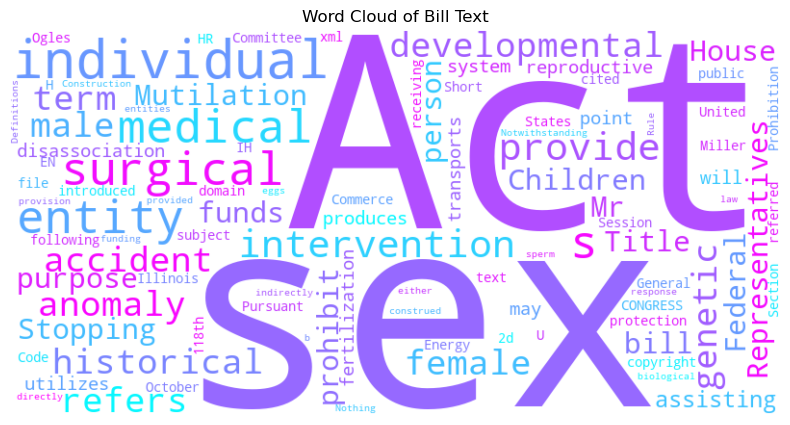

In [141]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='cool'
).generate(cleaned)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Bill Text")
plt.show()

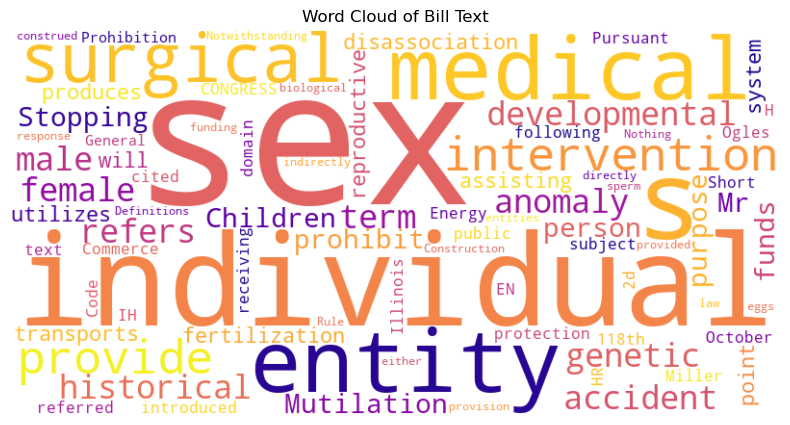

In [153]:
stopwords = set(STOPWORDS)
#May add more stopwords if needed
stopwords.update(['section', 'act', 'shall', 'may', 'bill', 'Title', 'Federal','House','xml','Committee','Session','United','States','b',
                  'Representatives','U','copyright','file'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    colormap='plasma'
).generate(cleaned)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Bill Text")
plt.show()